# Twitter Sentiment Prediction

### Einleitung

In dieser Analyse widmen wir uns der Vorhersage von Sentimenten in Tweets. Twitter ist eine weitverbreitete Plattform, auf der täglich Millionen von Nutzern ihre Gedanken, Meinungen und Emotionen zu verschiedenen Themen teilen. Diese Daten bieten eine wertvolle Quelle für die Sentiment-Analyse, die darauf abzielt, die emotionale Haltung eines Textes automatisch zu klassifizieren. Dies kann hilfreich sein, um die allgemeine Stimmung zu aktuellen Themen zu verstehen, Trends zu identifizieren oder Meinungen zu bestimmten Ereignissen zu analysieren.

### Ziel der Analyse

Ziel dieses Projekts ist es, ein Modell zu entwickeln, das in der Lage ist, den emotionalen Gehalt von Tweets – sei es positiv, negativ oder neutral – zuverlässig vorherzusagen.

### Vorgehensweise

Datenerhebung: Zunächst sammeln wir einen Datensatz von Tweets, der als Grundlage für die Analyse dient.
Datenvorverarbeitung: Die Tweets werden bereinigt, tokenisiert und für die Modellierung vorbereitet.
Modelltraining: Wir trainieren verschiedene maschinelle Lernmodelle, um die bestmögliche Sentiment-Klassifizierung zu erzielen.
Evaluierung: Die Leistungsfähigkeit der Modelle wird anhand von Metriken wie Genauigkeit, Präzision und F1-Score bewertet.

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
df = pd.read_csv('train.csv')

df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [23]:
df.drop(['selected_text'], axis = 1, inplace = True)

In [25]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [27]:
df.drop(['textID'], axis = 1, inplace = True)

In [29]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


### Countplot

Durch einen Countplot können wir die Anzahl der Kategorien in unserem Datensatz visualisieren. So kann man auf einen
Blick sehen welche Kategorien dominieren. In unserem Fall sind die meisten Tweets "neutral", also weder zu positiv, noch zu negativ.

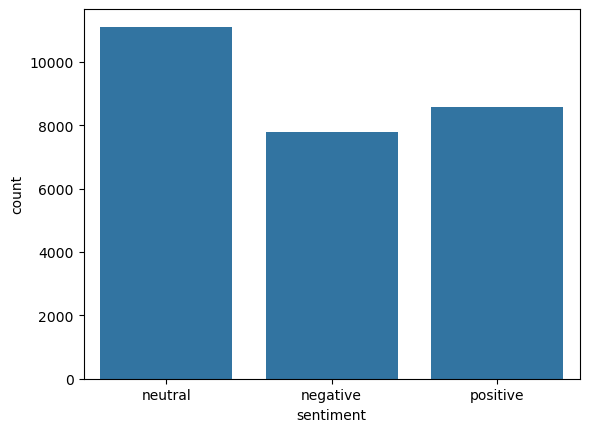

In [31]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

Der Datensatz besteht aus ca. 27.000 Datenpunkten und für jeden dieser Datenpunkte gibt es zwei verschiedene Variablen (Spalten).

In [33]:
df.shape

(27481, 2)

Wir schauen uns den "head" unserer "text" Spalte an, um ein besseres Bild unserer Daten zu bekommen.

In [35]:
df['text'].head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Durch die Informationen können wir sehen, dass in der Spalte "text" ein Eintrag fehlt und in der Spalte "sentiment" keine Werte fehlen.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


Mit der Pandas isnull() Methode, können wir NaN-Werte identifzieren. Diese hat uns zurückgegeben, dass Zeile 314 des Dateframes
einen fehlenden Wert hat. Dieser Wert wurde dann entfernt.

In [39]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

nan


In [41]:
df.dropna(inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [45]:
# Fügt die Textlänge jeder Zeile in einer neuen Zeile 'text_length' hinzu
df['text_length'] = df['text'].apply(lambda x: len(x))

In [47]:
df.head()

,text,sentiment,text_length
0,"I`d have responded, if I were going",neutral,36
1,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,my boss is bullying me...,negative,25
3,what interview! leave me alone,negative,31
4,"Sons of ****, why couldn`t they put them on t...",negative,75


In [49]:
#Neue Spalte mit der Anzahl der Wörter
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [51]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [53]:
# Dataframes für positive, negative und neutrale Sentiments

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [57]:
print(positive_df.shape)
print(negative_df.shape)
print(neutral_df.shape)

(8582, 4)
(7781, 4)
(11117, 4)


In [62]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [64]:
positive_df.head()

,text,sentiment,text_length,text_words
6,2am feedings for the baby are fun when he is a...,positive,64,14
9,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,I really really like the song Love Story by Ta...,positive,56,11
21,Playing Ghost Online is really interesting. Th...,positive,135,24
25,"the free fillin` app on my ipod is fun, im add...",positive,51,11


### WordCloud Positive

Durch die Erstellung einer Wordcloud können wir auf einen Blick erkennen, welche Begriffe in den positiven, negativen oder neutralen Tweets besonders häufig vorkommen. Dies ermöglicht es, Muster und Schlüsselwörter zu identifizieren, die für bestimmte Stimmungen typisch sind. Die visuelle Darstellung hilft dabei, wichtige Wortelemente leichter zu erfassen und bietet eine intuitive Möglichkeit, die dominierenden Themen und Emotionen in den Textdaten zu analysieren.

In [60]:
wordcloud = WordCloud(width = 500, height = 500)

In [70]:
positive_text = []

for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [72]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

<function matplotlib.pyplot.show(close=None, block=None)>

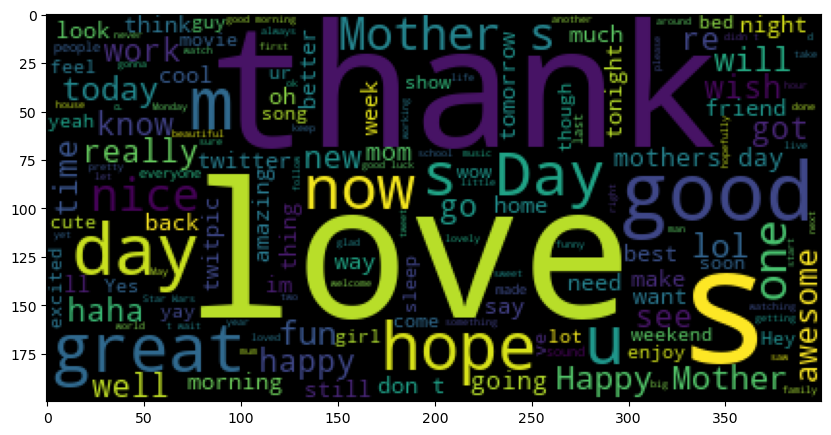

In [77]:
wordcloud = WordCloud(stopwords = set(STOPWORDS))
wordcloud.generate(''.join(positive_text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show

### WordCloud Positive

In [81]:
negative_text = []

for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [83]:
negative_text[:5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

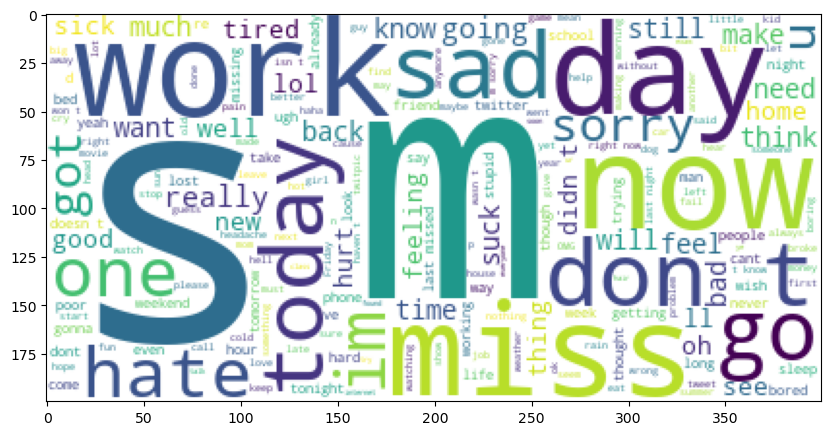

In [94]:
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

### Training und Cross-Validation Daten



In [96]:
X = df.drop(['sentiment'], axis = 1)
y= df['sentiment']

In [98]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [100]:
X_train.shape

(19236, 3)

In [102]:
X_cv.shape

(8244, 3)

### Funktion die Wörter ersetzt

Diese Funktion wird verwendet, um Kontraktionen die im englischen oft verwendet werden zu erweitern.
Sie ist gerade bei Textverarbeitung für maschinelles Lernen und NLP nützlich.

In [105]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [107]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


### Preprocessing 



In [116]:
from tqdm import tqdm
# tqdm for the progress bar
stopwords = set(STOPWORDS)

preprocessed_text = []

for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence) # Erweitert Konstruktionen
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent) #Entfernt Sonderzeichen und ersetzt diese durch Leerzeichen
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    #Filtert Stopwörter
    preprocessed_text.append(sent.lower().strip())
    # lower(), alles in Kleinbuchstaben, strip() entfernt nachfolgende Sonderzeichen, Speicherung

100%|██████████| 19236/19236 [00:00<00:00, 39150.39it/s]


In [118]:
preprocessed_text[:5]

['24 hours now dog put sleep rip old friend',
 'feeling comfortable today',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'textmate crashed first time 3 months bad actually textmate']

In [120]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [122]:
X_train.head()

,text,text_length,text_words
19832,24 hours now dog put sleep rip old friend,78,18
10340,feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months bad actua...,80,14


In [124]:
from tqdm import tqdm

preprocessed_text = []

for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 47964.69it/s]


In [126]:
preprocessed_text[0: 5]

['mom happy present yayy',
 'surprise probably don t know',
 'nope difference 5 omr c class anyone notice flight number wy s flight lhr wy 911',
 'smells badly garlic',
 'friday whole different meaning work saturday sunday']

In [128]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [130]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,surprise probably don t know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


Die LabelBinarizer()-Klasse wird verwendet, um kategoriale Zielvariablen (z.B. Klassenlabels wie
positive, negative und neutral) in binäre Werte oder One-Hot-Encoding zu konvertieren. 

In [133]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [135]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

### Tfidf Vectorizer 

Diese Klasse wird verwendet, um Textdaten in numerische Vektoren zu transformieren.
TF = Term Frequency - Wie oft ein Wort in einem bestimmten Dokument vorkommt
IDF = Inverse Document Frequency - Wie selten oder häufig ein Wort in der gesamten Sammlung vorkommt. Diese Wörter erhalten ein geringeres Gewicht. 

Diese Gewichtung zeigt an, wie wichtig jedes Wort in einem bestimmten Dokument ist, relativ zu den anderen Dokumenten in einem Datensatz. 

In [139]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [143]:
X_train_text.shape

# Jede Spalte repräsentiert ein einzigartiges Wort aus dem Vokabular

(19236, 20621)

In [145]:
X_train_text[0: 5]

<5x20621 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

### Neutral Network Model for Prediction

In [148]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [150]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [152]:
y_train

19832    negative
10340    negative
11044    positive
14088    negative
20333     neutral
           ...   
15650    positive
22638    positive
10124    positive
5601     positive
14001    negative
Name: sentiment, Length: 19236, dtype: object

In [156]:
# Um unsere kategorialen Zielvariablen (Labels) in Ganzzahlen zu transformieren
# negativ 0 
# neutral 1
# positiv 2
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)

In [158]:
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [160]:
# One hot encoding
y_train_final = to_categorical(y_train_converted)

In [162]:
y_train_final

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [164]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [166]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [168]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [170]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [172]:
# Sklaieren der Daten zwischen 0 und 1
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [174]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [176]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [182]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [184]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [186]:
y_train_final[0: 5]


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [188]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

### Count Vectorizer

Der CountVectorizer wandelt Textdaten in numerische Vektoren um, die die Häufigkeit von Wörtern darstellen.

In [223]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [225]:
X_train_vectorized

<19236x20621 sparse matrix of type '<class 'numpy.int64'>'
	with 133578 stored elements in Compressed Sparse Row format>

In [236]:
from scipy.sparse import hstack

X_train_new = hstack([X_train_vectorized, X_train_final])  
X_cv_new = hstack([X_cv_vectorized, X_cv_final])

### Neural Network Model 

In [284]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [316]:
history = model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))


Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9820 - loss: 0.0550 - val_accuracy: 0.6510 - val_loss: 2.7864
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9808 - loss: 0.0545 - val_accuracy: 0.6578 - val_loss: 2.9658
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9828 - loss: 0.0540 - val_accuracy: 0.6571 - val_loss: 2.9386
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9805 - loss: 0.0545 - val_accuracy: 0.6562 - val_loss: 2.7494
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9810 - loss: 0.0502 - val_accuracy: 0.6550 - val_loss: 3.0731
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9821 - loss: 0.0526 - val_accuracy: 0.6583 - val_loss: 3.0148
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9817 - loss: 0.0505 - val_accuracy: 0.6582 - val_loss: 3.2961
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9839 - loss: 0.0484 - 

In [318]:
print(model.evaluate(X_train_new, y_train_final))

602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9968 - loss: 0.0090
[0.007781991735100746, 0.9972967505455017]


In [320]:
print(model.evaluate(X_cv_new, y_cv_final))

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6583 - loss: 3.5216
[3.501044988632202, 0.6606016755104065]


### Conclusions

In meiner Twitter-Sentiment-Analyse zeigt das Modell eine hohe Trainingsgenauigkeit von 99,68% und eine deutlich niedrigere Testgenauigkeit von 65,83%, was stark auf Overfitting hinweist. Das Modell passt sich zu stark an die Trainingsdaten an und generalisiert schlecht auf unbekannte Daten.

Verbesserungsmöglichkeiten:
Regularisierung: Erhöhte L2-Regularisierung und angepasste Dropout-Raten können helfen, das Overfitting zu reduzieren.
Modellvereinfachung: Reduzierung der Netzwerkomplexität durch weniger Schichten oder Neuronen könnte die Generalisierungsfähigkeit verbessern.
Early Stopping: Die Implementierung von Early Stopping könnte verhindern, dass das Modell zu lange trainiert und überanpasst wird.
Datenaugmentation oder mehr Daten: Das Hinzufügen von mehr Trainingsdaten oder die Verwendung von Datenaugmentation könnte die Modellrobustheit verbessern.